In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, normalize

from skimage import io

np.random.seed(42)

In [2]:
def noisy(image, sigma):
    
    row,col= image.shape
    mean = 0
    img=np.array(image).astype(np.float32)
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = img + gauss
    return noisy

In [3]:
X = sorted(glob('/home/prakash/Desktop/NAS/StarVoid/Sim/Raw/*.tif'))
Y = sorted(glob('/home/prakash/Desktop/NAS/StarVoid/Sim/GT/*.tif'))

Text(0.5, 1.0, 'Raw image')

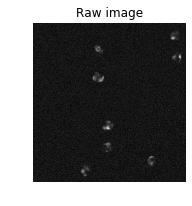

In [4]:
X = list(map(imread,X))
Y = list(map(imread,Y))
plt.subplot(121); plt.imshow(X[9],cmap='gray');   plt.axis('off'); plt.title('Raw image')

In [5]:
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
n_test = int(round(0.2*len(X)))
ind_pretrn, ind_test = ind[:-n_test], ind[-n_test:]
X_test, Y_test = [X[i] for i in ind_test] , [Y[i] for i in ind_test]
X_pretrn, Y_pretrn = [X[i] for i in ind_pretrn] , [Y[i] for i in ind_pretrn]
print('number of images: %3d' % len(X))
print('- training+validation:       %3d' % len(X_pretrn))
print('- test:     %3d' % len(X_test))

number of images: 150
- training+validation:       120
- test:      30


In [6]:
rng = np.random.RandomState(42)
ind = rng.permutation(len(X_pretrn))
n_val = int(round(0.15 * len(X_pretrn)))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]
X_val, Y_val = [X_pretrn[i] for i in ind_val]  , [Y_pretrn[i] for i in ind_val]
X_train, Y_train = [X_pretrn[i] for i in ind_train]  , [Y_pretrn[i] for i in ind_train]
print('number of images: %3d' % len(X))
print('- training:       %3d' % len(X_train))
print('- validation:     %3d' % len(X_val))

number of images: 150
- training:       102
- validation:      18


In [7]:
X_train = np.array(X_train)[:768,:736]
X_test = np.array(X_test)
X_val = np.array(X_val)[:768,:736]

Y_train = np.array(Y_train)[:768,:736]
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)[:768,:736]

In [8]:
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/GTTrain.npy",Y_train)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/GTTest.npy",Y_test)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/GTVal.npy",Y_val)

79 282


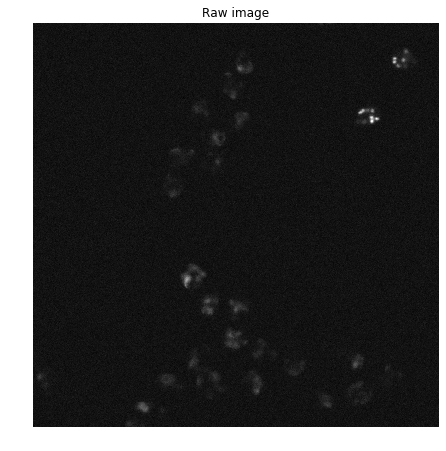

In [9]:
i = 9
img, lbl = X_train[i], Y_train[i]
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image')
None;
print(np.min(img),np.max(img))

In [10]:
std=10.0
X_train10 = [noisy(x,std) for x in tqdm(X_train)]
X_test10 = [noisy(x,std) for x in tqdm(X_test)]
X_val10 = [noisy(x,std) for x in tqdm(X_val)]

std=20.0
X_train20 = [noisy(x,std) for x in tqdm(X_train)]
X_test20 = [noisy(x,std) for x in tqdm(X_test)]
X_val20 = [noisy(x,std) for x in tqdm(X_val)]

100%|██████████| 18/18 [00:00<00:00, 32.22it/s]


43.58208831108282 281.2404376481663
-0.8167207000517749 304.77005188600333


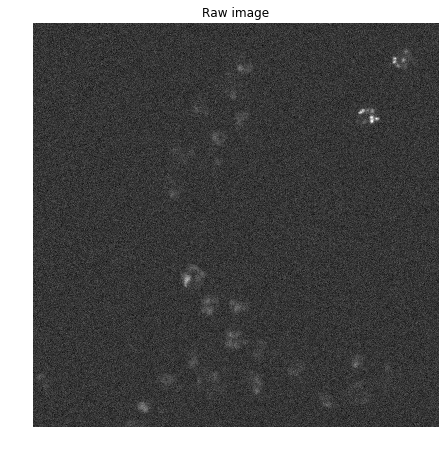

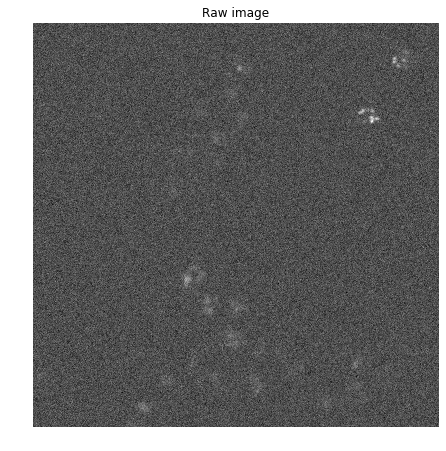

In [11]:
i = 9
img, lbl = X_train10[i], Y_train[i]
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image')
None;
print(np.min(img),np.max(img))

i = 9
img, lbl = X_train20[i], Y_train[i]
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image')
None;
print(np.min(img),np.max(img))

In [12]:
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/NumpyData/NoisyTrain.npy",X_train)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/NumpyData/NoisyTest.npy",X_test)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/NumpyData/NoisyVal.npy",X_val)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/NumpyData/Noisy10Train.npy",X_train10)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/NumpyData/Noisy10Test.npy",X_test10)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/NumpyData/Noisy10Val.npy",X_val10)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/NumpyData/Noisy20Train.npy",X_train20)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/NumpyData/Noisy20Test.npy",X_test20)
np.save("/home/prakash/Desktop/NAS/StarVoid/Sim/NumpyData/Noisy20Val.npy",X_val20)
